In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LinearRegression

In [2]:
data={'StudentPopulation':[2,6,8,8,12,16,20,20,22,26],'Sales':[58,105,88,118,117,137,157,169,149,202]}
data=pd.DataFrame(data)
data

,StudentPopulation,Sales
0,2,58
1,6,105
2,8,88
3,8,118
4,12,117
5,16,137
6,20,157
7,20,169
8,22,149
9,26,202


/home/abhilash/miniconda3/envs/py3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


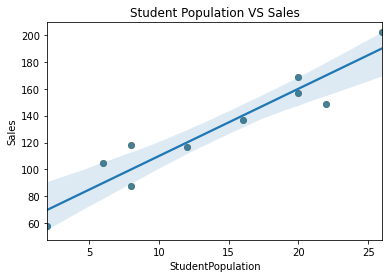

In [3]:
plt.scatter(data.StudentPopulation,data.Sales,color='orange')
sns.regplot(data.StudentPopulation,data.Sales)
plt.title('Student Population VS Sales')
plt.show();

In [4]:
x=data.StudentPopulation
y=data.Sales
x=sm.add_constant(x)
model=sm.OLS(y,x)
reg=model.fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     74.25
Date:                Thu, 24 Dec 2020   Prob (F-statistic):           2.55e-05
Time:                        13:13:32   Log-Likelihood:                -39.342
No. Observations:                  10   AIC:                             82.68
Df Residuals:                       8   BIC:                             83.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                60.0000      9.22

/home/abhilash/.local/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


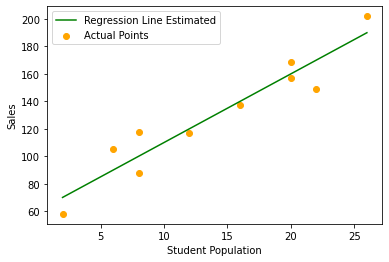

In [5]:
plt.plot(data.StudentPopulation,(60+5*data.StudentPopulation),color='green',label='Regression Line Estimated')
plt.scatter(data.StudentPopulation,data.Sales,color='orange',label='Actual Points')
#sns.regplot(data.StudentPopulation,data.Sales,color='red')
plt.xlabel('Student Population')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [6]:
# Python code for prediction interval
from statsmodels.stats.outliers_influence import summary_table
st,data1,ss2=summary_table(reg,alpha=0.05)
fitted_values=data1[:2]
predicted_mean_se=data1[:3]
predicted_mean_ci_low,predicted_mean_ci_up=data1[:,4:6].T
predicted_ci_low,predicted_ci_up=data1[:,6:8].T

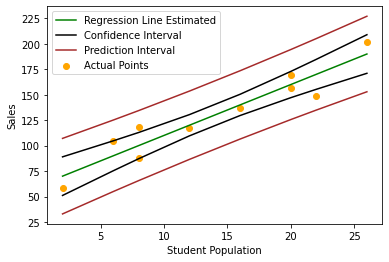

In [12]:
x=data.StudentPopulation
plt.plot(data.StudentPopulation,(60+5*data.StudentPopulation),color='green',label='Regression Line Estimated')
plt.scatter(data.StudentPopulation,data.Sales,color='orange',label='Actual Points')
plt.plot(x,predicted_mean_ci_low,color='black',label='Confidence Interval')
plt.plot(x,predicted_mean_ci_up,color='black')
plt.plot(x,predicted_ci_low,color='brown',label='Prediction Interval')
plt.plot(x,predicted_ci_up,color='brown')

plt.xlabel('Student Population')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [13]:
data

,StudentPopulation,Sales
0,2,58
1,6,105
2,8,88
3,8,118
4,12,117
5,16,137
6,20,157
7,20,169
8,22,149
9,26,202


In [ ]:
data['EstimatedSales']=[60+5*i for i in data.StudentPopulation]

In [18]:
data['Residual']=data['Sales']-data['EstimatedSales']

In [19]:
data

,StudentPopulation,Sales,EstimatedSales,Residual
0,2,58,70,-12
1,6,105,90,15
2,8,88,100,-12
3,8,118,100,18
4,12,117,120,-3
5,16,137,140,-3
6,20,157,160,-3
7,20,169,160,9
8,22,149,170,-21
9,26,202,190,12


Text(0.5, 1.0, 'Residual Against Student Population')

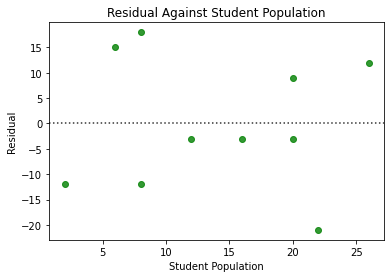

In [23]:
sns.residplot(data.StudentPopulation,data.Sales,color='green');
plt.ylabel('Residual')
plt.xlabel('Student Population')
plt.title('Residual Against Student Population')

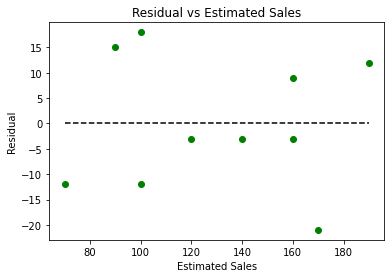

In [36]:
plt.scatter(data.EstimatedSales,data.Residual,color='green')
plt.plot(data.EstimatedSales,[0*i for i in data.EstimatedSales],color='black',linestyle='--')
plt.xlabel('Estimated Sales')
plt.ylabel('Residual')
plt.title('Residual vs Estimated Sales')
plt.show();

In [58]:
residual=np.array(data.Residual)
from sklearn.preprocessing import StandardScaler,Normalizer
scale=StandardScaler()
scaled_residual=scale.fit_transform(residual.reshape(-1,1))
scaled_residual=scaled_residual.reshape(-1)
scaled_residual


array([-0.9701425 ,  1.21267813, -0.9701425 ,  1.45521375, -0.24253563,
       -0.24253563, -0.24253563,  0.72760688, -1.69774938,  0.9701425 ])

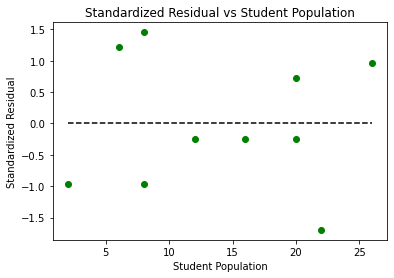

In [59]:
plt.scatter(data.StudentPopulation,scaled_residual,color='green')
plt.plot(data.StudentPopulation,[0*i for i in data.EstimatedSales],color='black',linestyle='--')
plt.xlabel('Student Population')
plt.ylabel('Standardized Residual')
plt.title('Standardized Residual vs Student Population')
plt.show();

In [62]:
from statsmodels.formula.api import ols
reg1=ols('Sales ~ StudentPopulation',data=data)
fit1=reg1.fit()
print(fit1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     74.25
Date:                Thu, 24 Dec 2020   Prob (F-statistic):           2.55e-05
Time:                        14:34:57   Log-Likelihood:                -39.342
No. Observations:                  10   AIC:                             82.68
Df Residuals:                       8   BIC:                             83.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            60.0000      9.22

/home/abhilash/.local/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [63]:
anova_table=sm.stats.anova_lm(fit1,type=1)
print(anova_table)

                    df   sum_sq   mean_sq          F    PR(>F)
StudentPopulation  1.0  14200.0  14200.00  74.248366  0.000025
Residual           8.0   1530.0    191.25        NaN       NaN


In [65]:
influence=fit1.get_influence()
resid_student=influence.resid_studentized_external
resid_student

array([-1.09212653,  1.26798654, -0.94196706,  1.54023214, -0.21544891,
       -0.21544891, -0.22263461,  0.68766487, -2.01063738,  1.09212653])

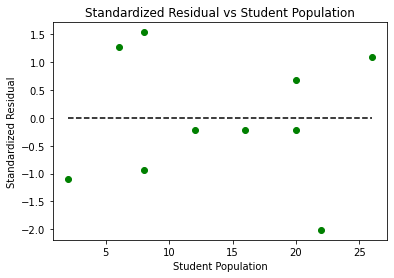

In [66]:
plt.scatter(data.StudentPopulation,resid_student,color='green')
plt.plot(data.StudentPopulation,[0*i for i in data.EstimatedSales],color='black',linestyle='--')
plt.xlabel('Student Population')
plt.ylabel('Standardized Residual')
plt.title('Standardized Residual vs Student Population')
plt.show();

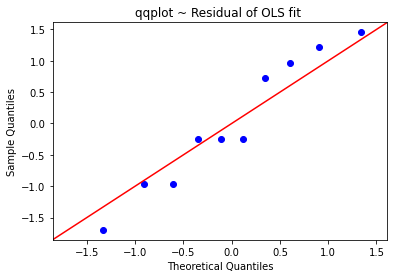

In [70]:
from scipy import stats
res=fit1.resid #residual
probplot=sm.ProbPlot(res,stats.norm,fit=True)
fig=probplot.qqplot(line='45')
h=plt.title('qqplot ~ Residual of OLS fit ')
plt.show()